In [1]:
import pandas as pd
import soundfile as sf
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# Pandas is a manipulation tool that allows to sstore and manipulate tabular data. i used it to get wave files from the csv.

In [2]:
##### reading the sound files from the down_loaded_freesound_files3.csv


sfile = pd.read_csv('down_loaded_freesound_files3.csv') 

#calling the sound files directly from the newfilenale column

S_one = (sfile.newfilename[17])

S_two = (sfile.newfilename[0])

S_three = (sfile.newfilename[21])

S_four = (sfile.newfilename[1])

print(S_one)
print(S_two)
print(S_three)
print(S_four)

119860.wav
55093.wav
179008.wav
55099.wav


# Py soundfile can read and write sound files

WAV file:  Fs = 44100, x.shape = (543782,), x.dtype = float64


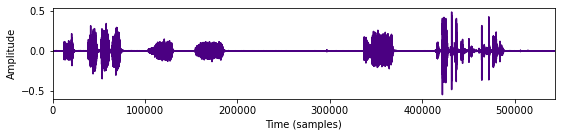

WAV file:  Fs = 44100, x.shape = (1317865,), x.dtype = float64


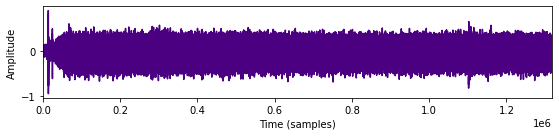

WAV file:  Fs = 44100, x.shape = (65536,), x.dtype = float64


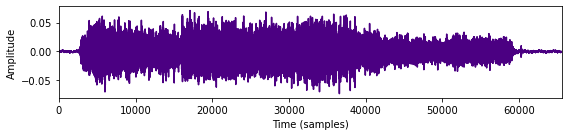

WAV file:  Fs = 44100, x.shape = (493931,), x.dtype = float64


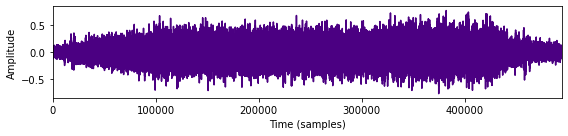

In [4]:
def print_plot_play(x, Fs, text=''):
# Prints information about an audio singal, plots the waveform, Creates player 
        # x: Input signal
       # # Fs: Sampling rate of x    
        #text: Text to print
        
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='indigo')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()



#Load the audio files ans ample rates
x1, Fs1 = sf.read(S_one)
x2,Fs2  = sf.read(S_two)
x3,Fs3  = sf.read(S_three)
x4,Fs4  = sf.read(S_four)

#plotting waveforms
print_plot_play(x=x1, Fs=Fs1, text='WAV file: ' )
print_plot_play(x=x2, Fs=Fs2, text='WAV file: ')
print_plot_play(x=x3, Fs=Fs3, text='WAV file: ') 
print_plot_play(x=x4, Fs=Fs4, text='WAV file: ') 

# Use numpy.fft to calculate a Fourier transform for the first second of each file
# FFT (Fast Fourier Transform) refers to a way the discrete Fourier Transform (DFT) can be calculated efficiently, by using symmetries in the calculated terms.
# Discrete Fourier Transform (DFT) is defined as:
# $X _{k}=\sum \limits _{n=0} ^{N-1} \int \limits x _{n}e^{-2πikn/N} $  N=number of samples, n = current sample, $x _n$=value of the signal at time n,k = current frequency (0 Hz to N-1 Hz),Xk = Result of the DFT (amplitude and phase)


 

# np.fft.fft computes the one dimensional discrete Fourier transform. the rfft computes the one dimensional discrete fourier transform for real input


In [101]:
def plot_mag(wave_sig, sr, title, f_ratio=0.1):
    ## Plots magnitude spectrum of the first sec
        # wave_sig: Input signal
       # # sr: Sampling rate of the signal  
        #title: Text to print
        #f_ratio : for one sec
    duration = 1
    X_time = 1*sr 
        
       #Fourier transform for the first second of each file 
    X = np.fft.rfft(wave_sig[:X_time])# returns the fourier transform of the wave signals
    #https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html
    #spectrum from each Fourier transformed second
    TP_mag = np.absolute(X) #returns the absolute value as x
    FTP = np.linspace(0, sr, len(TP_mag)) 
    
    plt.figure(figsize=(16, 5))
    
    
    plt.plot(FTP, TP_mag, color='red')
    #plt.xscale('log')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(title)

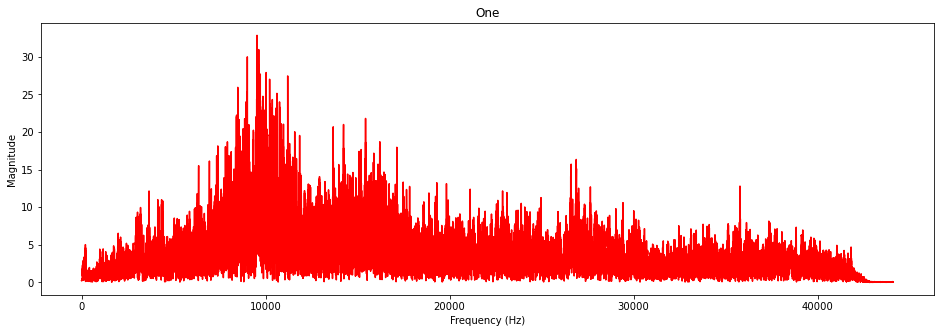

In [102]:
plot_mag(x1, Fs1, "One" )

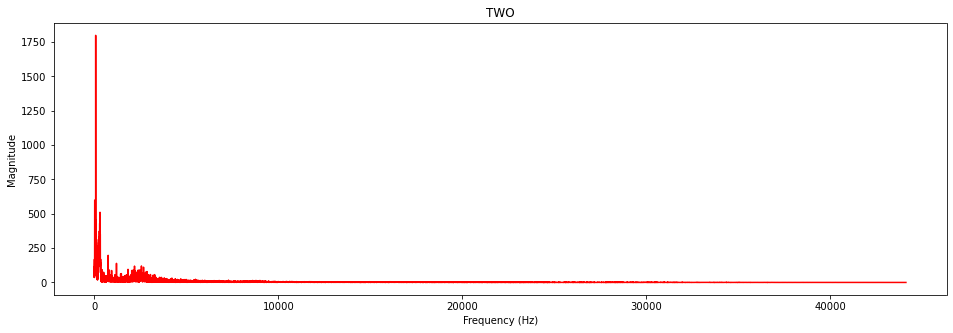

In [103]:
plot_mag(x2, Fs2, "TWO" )

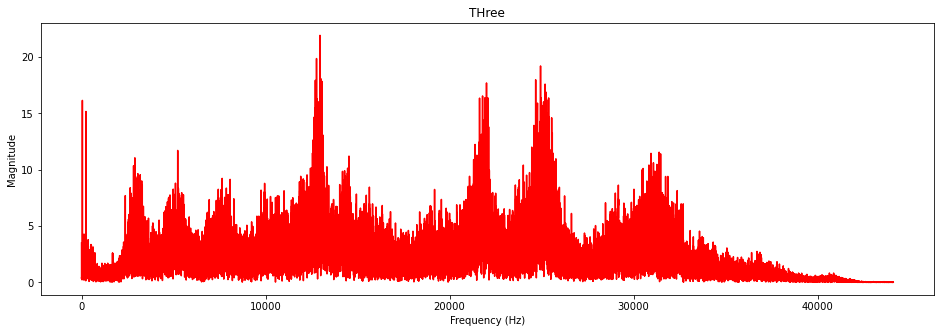

In [104]:
plot_mag(x3, Fs3, "THree" )

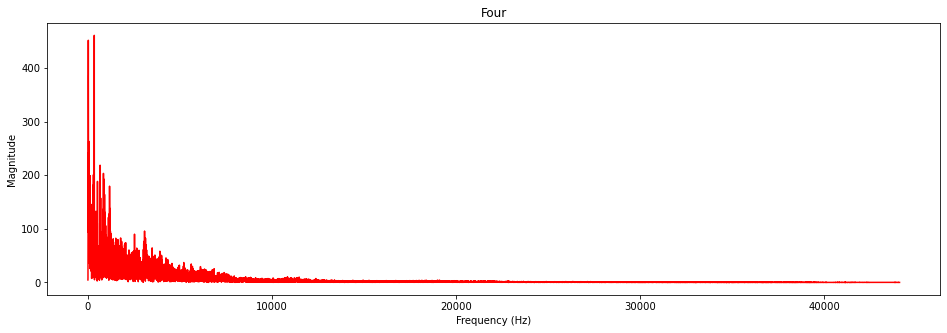

In [105]:
plot_mag(x4, Fs4, "Four" )

Plotting with log10 scale

In [5]:
def plot_magnitude(wave_sig, sr, title, f_ratio=0.1):
    ## Plots magnitude spectrum of the first sec
        # wave_sig: Input signal
       # # sr: Sampling rate of the signal  
        #title: Text to print
        #f_ratio : for one sec
    duration = 1
    X_time = 1*sr 
        
       #Fourier transform for the first second of each file 
    X = np.fft.rfft(wave_sig[:X_time])# returns the fourier transform of the wave signals
    
    #spectrum from each Fourier transformed second
    TP_mag = np.absolute(X) #returns the absolute value as x
    FTP = np.linspace(0, sr, len(TP_mag)) 
    spect = 20 * np.log10(TP_mag)
    plt.figure(figsize=(16, 5))
    
    
    plt.plot(spect,color='green')
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(title)

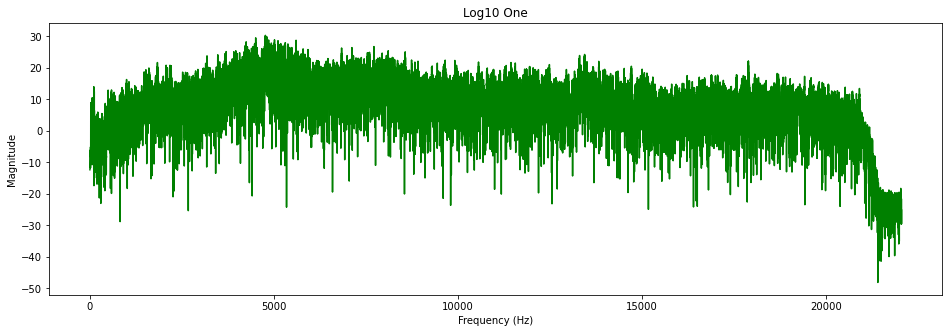

In [6]:
plot_magnitude(x1, Fs1, "Log10 One" )

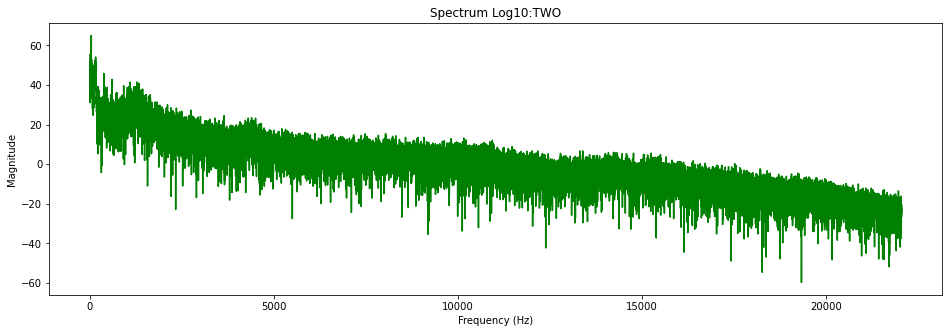

In [7]:
plot_magnitude(x2, Fs2, "Spectrum Log10:TWO" )

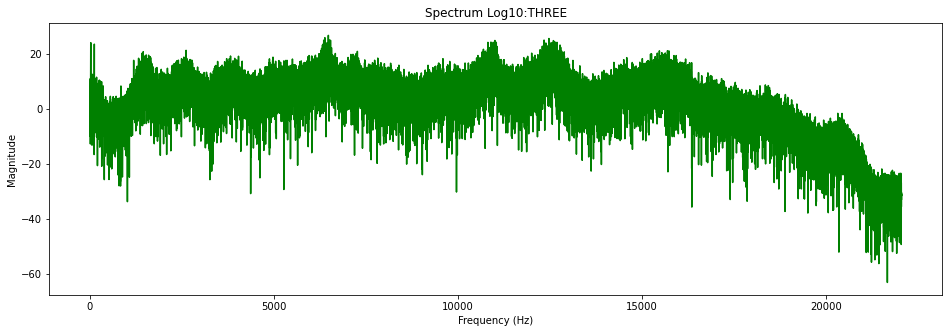

In [8]:
plot_magnitude(x3, Fs3, "Spectrum Log10:THREE" )

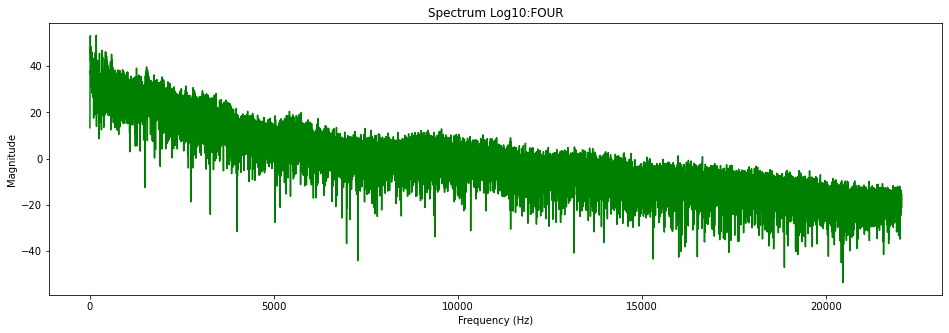

In [9]:
plot_magnitude(x4,Fs4, "Spectrum Log10:FOUR" )

Reference:
    -Wikipedia
        -https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html
        -https://numpy.org/doc/stable/reference/generated/numpy.absolute.html